In [12]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [13]:
# for the solution to question 1, define the likelihood function
def likelihood(w0, w1, y, x, sigma=0.1):
    z = y*np.ones_like(w0)-w0-x*w1
    p = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-0.5 * z ** 2 / sigma ** 2)
    return p

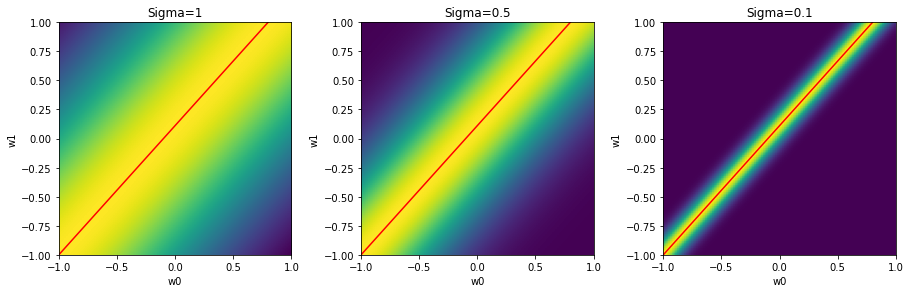

<Figure size 432x288 with 0 Axes>

In [20]:
# for the solution to question 1, draw the likelihood in the space formed by w0 and w1
resolution = 100
range_w0 = range_w1 = np.linspace(-1, 1, resolution)
grid_w0, grid_w1 = np.meshgrid(range_w0, range_w1)

arr_sig = [1, 0.5, 0.1]

plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.3)

for i, sigma in enumerate(arr_sig):
    grid_p = likelihood(grid_w0, grid_w1, y=-0.1, x=-0.9, sigma=sigma)
    
    w0 = 0.9 * range_w1 - 0.1

    plt.subplot(1, 3, i+1)
    plt.imshow(grid_p, origin='lower', extent=(-1, 1, -1, 1))
    # plt.contourf(grid_w0, grid_w1, grid_p)
    plt.plot(w0, range_w1, c='r')
    plt.xlabel('w0')
    plt.ylabel('w1')
    plt.title('Sigma={}'.format(sigma))

plt.show()
plt.savefig('likelihood_exer9_q1.pdf', format='pdf')
plt.clf()

In [15]:
# for solution to question 2, these functions are borrowed from lab9, with minor modifications on plot_posterior
def posterior(Phi, t, alpha, beta, return_inverse=False):
    """Computes mean and covariance matrix of the posterior distribution."""
    S_N_inv = alpha * np.eye(Phi.shape[1]) + beta * Phi.T.dot(Phi)
    S_N = np.linalg.inv(S_N_inv)
    m_N = beta * S_N.dot(Phi.T).dot(t)

    if return_inverse:
        return m_N, S_N, S_N_inv
    else:
        return m_N, S_N

    
def plot_posterior(mean, cov, w0, w1, alpbeta, ax):
    resolution = 100

    grid_x = grid_y = np.linspace(-1, 1, resolution)
    grid_flat = np.dstack(np.meshgrid(grid_x, grid_y)).reshape(-1, 2)

    densities = stats.multivariate_normal.pdf(grid_flat, mean=mean.ravel(), cov=cov).reshape(resolution, resolution)

    ax.imshow(densities, origin='lower', extent=(-1, 1, -1, 1))
    ax.scatter(w0, w1, marker='x', c="r", s=20, label='Truth')

    ax.set_xlabel('w0')
    ax.set_ylabel('w1')
    ax.set_title('alpha = {0}, beta = {1}'.format(alpbeta[0], alpbeta[1]))
    
def identity_basis_function(x):
    return x

def gaussian_basis_function(x, mu, sigma=0.1):
    return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2)

def expand(x, bf, bf_args=None):
    if bf_args is None:
        return np.concatenate([np.ones(x.shape), bf(x)], axis=1)
    else:
        return np.concatenate([np.ones(x.shape)] + [bf(x, bf_arg) for bf_arg in bf_args], axis=1)

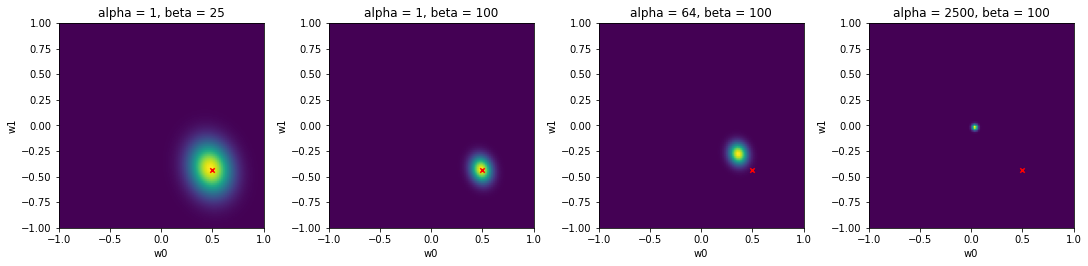

In [16]:
idx = np.arange(4)
arr_alpha = np.array([1, 1, 64, 2500])
arr_beta = np.array([25, 100, 100, 100])

X = np.array([[0.9], [-0.7]])
y = np.array([[0.1], [0.8]])

Phi = expand(X, identity_basis_function)

fixed_w0 = 0.8-0.7*7/16
fixed_w1 = -7/16


fig, axs = plt.subplots(1,4, figsize=(15,15), constrained_layout = True)

for i, alpha, beta in zip(idx, arr_alpha, arr_beta):
  alpbeta = (alpha, beta)
  m_N, S_N = posterior(Phi, y, alpha, beta)
  plot_posterior(m_N, S_N, fixed_w0, fixed_w1, alpbeta, ax=axs[i])


plt.savefig('poster_exer9_q2.pdf', format='pdf')
plt.clf()

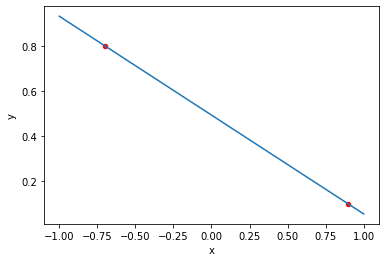

<Figure size 432x288 with 0 Axes>

In [19]:
# draw the fixed line in q2

ob_x = np.array([0.9, -0.7])
ob_y = np.array([0.1, 0.8])

w0 = 0.8-0.7*7/16
w1 = -7/16
x = np.linspace(-1, 1, resolution)

y = w0+w1*x
plt.plot(x, y)
plt.scatter(ob_x, ob_y, marker='o', c="r", s=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.savefig('fixed_line.pdf', format='pdf')
plt.clf()